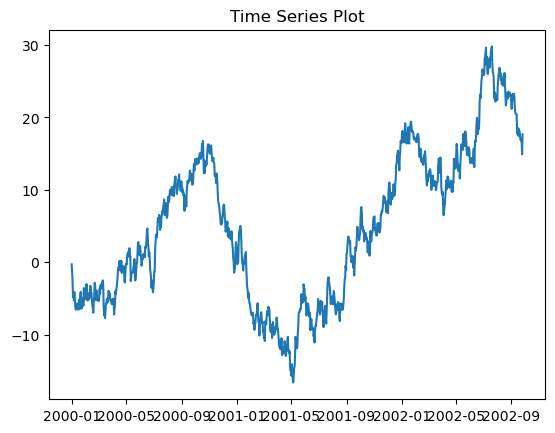

ADF Statistic: -1.2588395805808488
p-value: 0.6477867134682321
Critical Values:
   1%, -3.4369127451400474
Critical Values:
   5%, -2.864437475834273
Critical Values:
   10%, -2.568312754566378
KPSS Statistic: 2.0576371118774106
p-value: 0.01
Critical Values:
   10%, 0.347
Critical Values:
   5%, 0.463
Critical Values:
   2.5%, 0.574
Critical Values:
   1%, 0.739


/Users/vinoth/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss

# Generate a simple time series for illustration
ts = pd.Series(np.random.randn(1000), index=pd.date_range('2000-1-1', periods=1000))
ts = ts.cumsum()  # Convert to non-stationary

# Plotting the series
plt.plot(ts)
plt.title('Time Series Plot')
plt.show()

# ADF Test
result = adfuller(ts, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critical Values:')
    print(f'   {key}, {value}')

# KPSS Test
statistic, p_value, n_lags, critical_values = kpss(ts)
print(f'KPSS Statistic: {statistic}')
print(f'p-value: {p_value}')
for key, value in critical_values.items():
    print('Critical Values:')
    print(f'   {key}, {value}')


In [12]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

def is_stationary(timeseries):
    # Dickey-Fuller test
    result = adfuller(timeseries, autolag='AIC')
    p_value = result[1]
    if p_value < 0.05:
        return True  # Stationary
    else:
        return False  # Non-stationary

# Example
# Generate a simple time series for illustration
ts = pd.Series(np.random.randn(1000), index=pd.date_range('2000-1-1', periods=1000))
ts = ts.cumsum()  # Convert to non-stationary

if is_stationary(ts):
    print("The series is stationary.")
else:
    print("The series is not stationary.")


The series is not stationary.


In [13]:
def make_stationary(timeseries):
    # Differencing the time series
    stationary_ts = timeseries.diff().dropna()
    
    # You can repeatedly check if the series has become stationary and apply further differencing if necessary
    while not is_stationary(stationary_ts):
        stationary_ts = stationary_ts.diff().dropna()

    return stationary_ts

stationary_series = make_stationary(ts)

# Now you can verify
if is_stationary(stationary_series):
    print("The series is now stationary.")
else:
    print("The series is still not stationary.")


The series is now stationary.


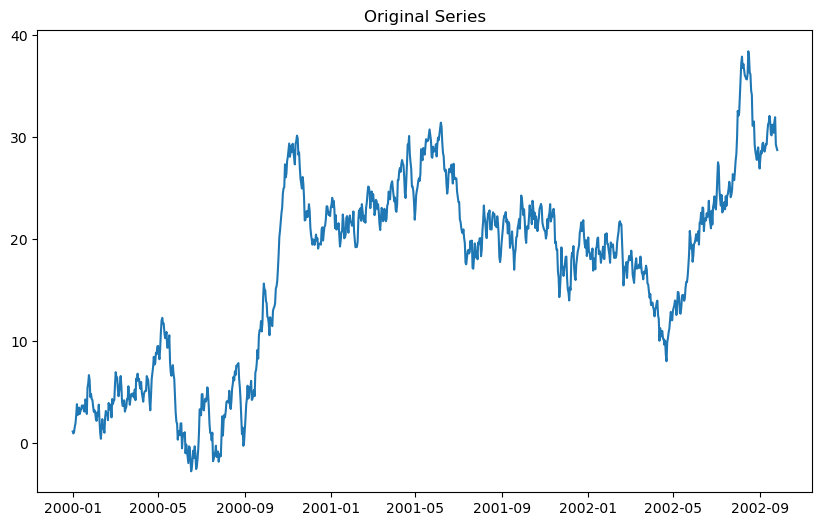

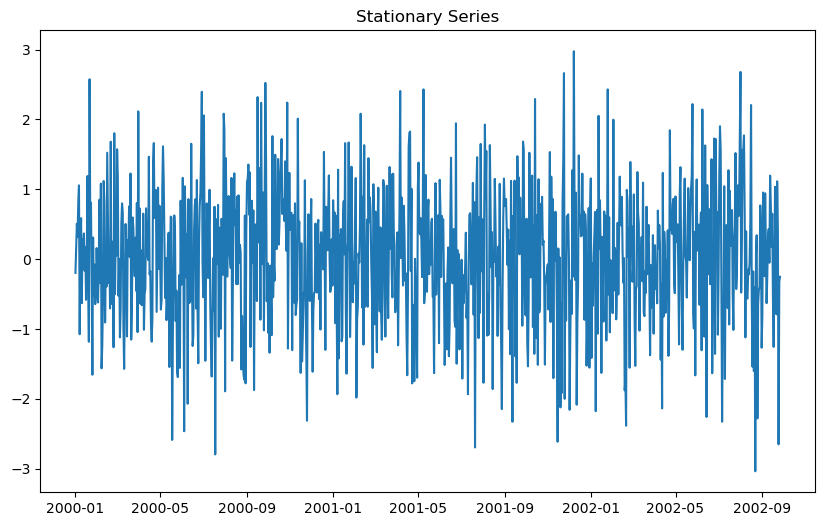

In [14]:
import matplotlib.pyplot as plt

def plot_series(series, title):
    plt.figure(figsize=(10, 6))
    plt.plot(series)
    plt.title(title)
    plt.show()

# Assuming you have your original series in a variable called `ts`
plot_series(ts, "Original Series")

# Now plot the stationary series
stationary_series = make_stationary(ts)
plot_series(stationary_series, "Stationary Series")


In [9]:
import networkx as nx

def create_directed_graph(edges):
    G = nx.DiGraph()  # Create a directed graph
    for (source, target, weight) in edges:
        G.add_edge(source, target, weight=weight)
    return G

# Example data (you'll have to extract this from your PDF's text)
edges = [
    ('DepartmentA', 'DepartmentB', 25),
    ('DepartmentA', 'DepartmentC', 50),
    ('DepartmentA', 'DepartmentD', 30),
    ('DepartmentD', 'DepartmentB', 10),
    ('DepartmentF', 'DepartmentC', 20),
    # ... add more edges as needed
]

graph = create_directed_graph(edges)


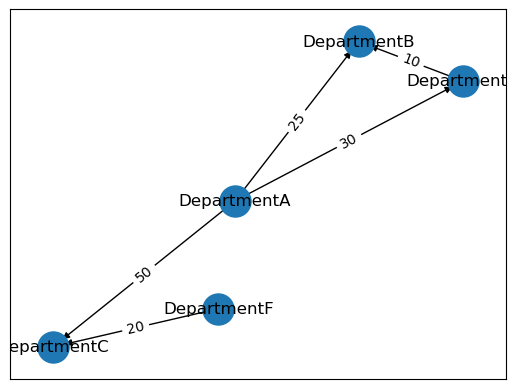

In [10]:
import matplotlib.pyplot as plt

def visualize_graph(G):
    pos = nx.spring_layout(G)  # positions for all nodes
    edge_labels = nx.get_edge_attributes(G, 'weight')
    
    nx.draw_networkx_nodes(G, pos, node_size=500)
    nx.draw_networkx_edges(G, pos)
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    
    plt.show()

visualize_graph(graph)
